<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1205_SHRISTI/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load color image
image = cv2.imread('/content/colored_picture.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to Grayscale

In [36]:
# Compute histogram for grayscale
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

In [37]:
# Compute histogram for color image (R, G, B)
colors = ('r', 'g', 'b')
hist_color = [cv2.calcHist([image_rgb], [i], None, [256], [0, 256]) for i in range(3)]

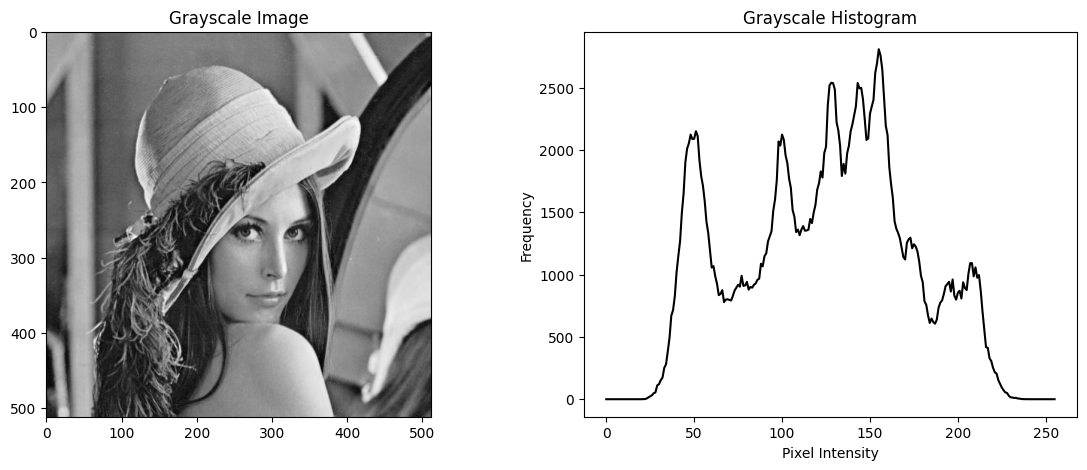

In [38]:
# --- 1. Display Original Image and its Histogram ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

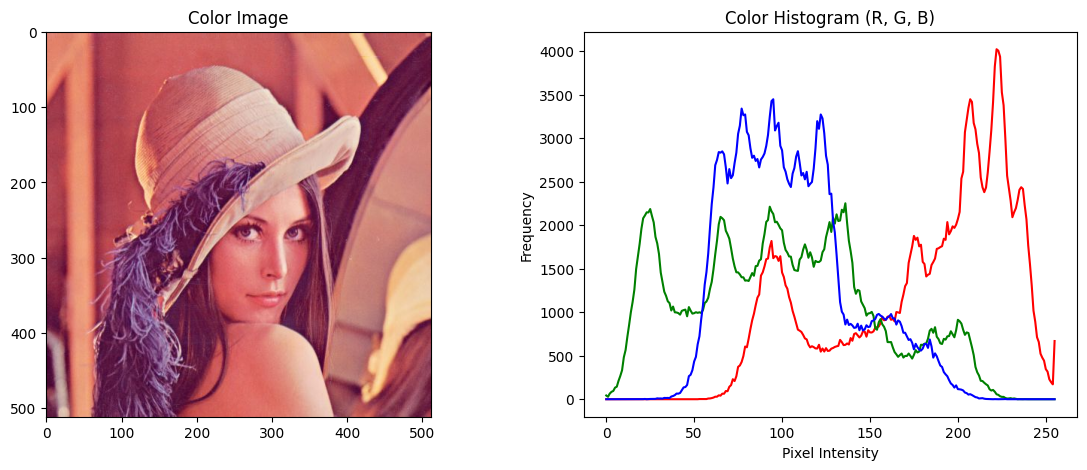

In [39]:
# --- 2. Display Color Image and its Histogram ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Color Image')

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    plt.plot(hist_color[i], color=col)
plt.title('Color Histogram (R, G, B)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



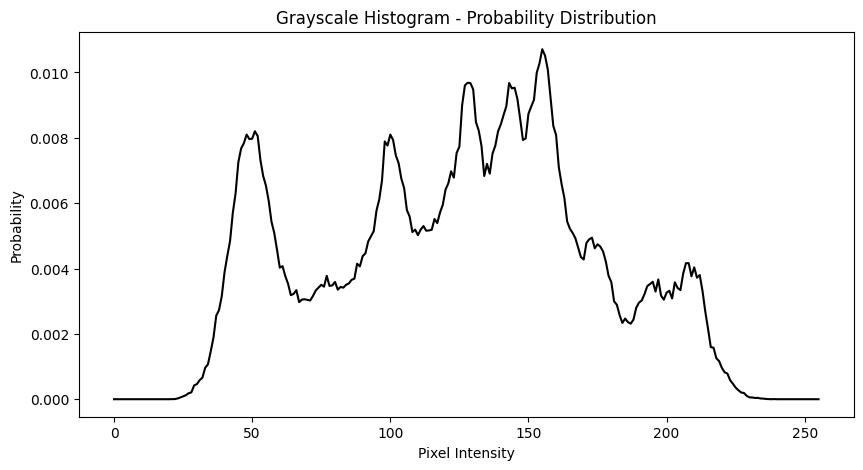

In [40]:
# --- 3. Probability Histogram (M2) ---
prob_hist_gray = hist_gray / hist_gray.sum()

plt.figure(figsize=(10, 5))
plt.plot(prob_hist_gray, color='black')
plt.title('Grayscale Histogram - Probability Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.show()

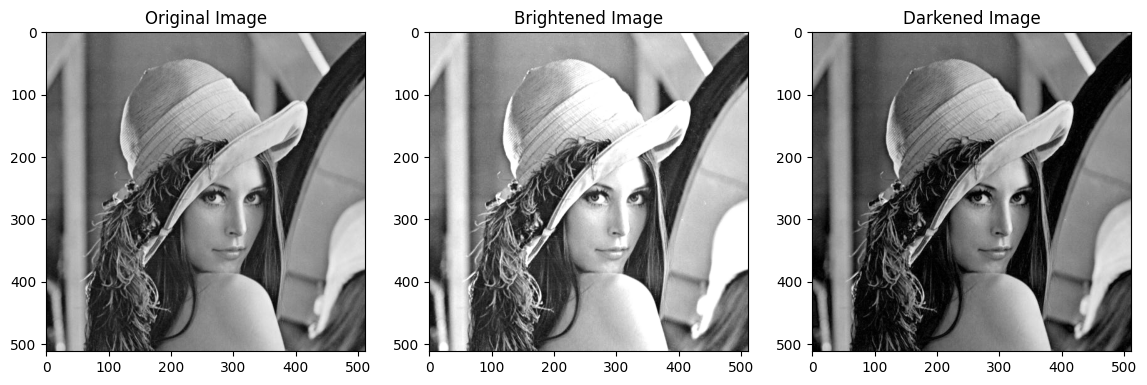

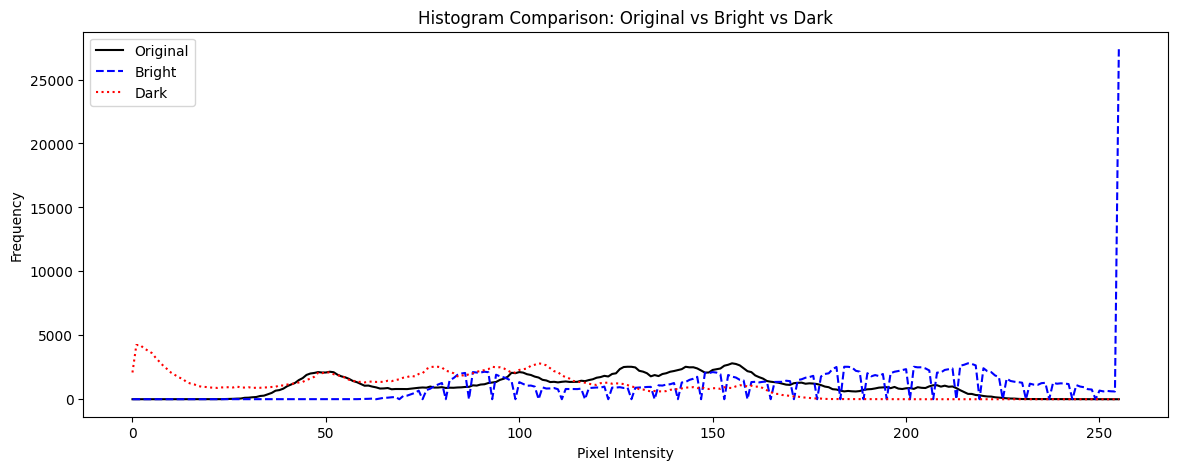

In [41]:
# --- 4. Bright and Dark Image Histograms ---
bright = cv2.convertScaleAbs(gray, alpha=1.2, beta=30)  # Increase brightness
dark = cv2.convertScaleAbs(gray, alpha=1.0, beta=-50)  # Decrease brightness

hist_bright = cv2.calcHist([bright], [0], None, [256], [0, 256])
hist_dark = cv2.calcHist([dark], [0], None, [256], [0, 256])

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(bright, cmap='gray')
plt.title('Brightened Image')

plt.subplot(1, 3, 3)
plt.imshow(dark, cmap='gray')
plt.title('Darkened Image')

plt.show()

plt.figure(figsize=(14, 5))
plt.plot(hist_gray, color='black', label='Original')
plt.plot(hist_bright, color='blue', linestyle='dashed', label='Bright')
plt.plot(hist_dark, color='red', linestyle='dotted', label='Dark')
plt.title('Histogram Comparison: Original vs Bright vs Dark')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

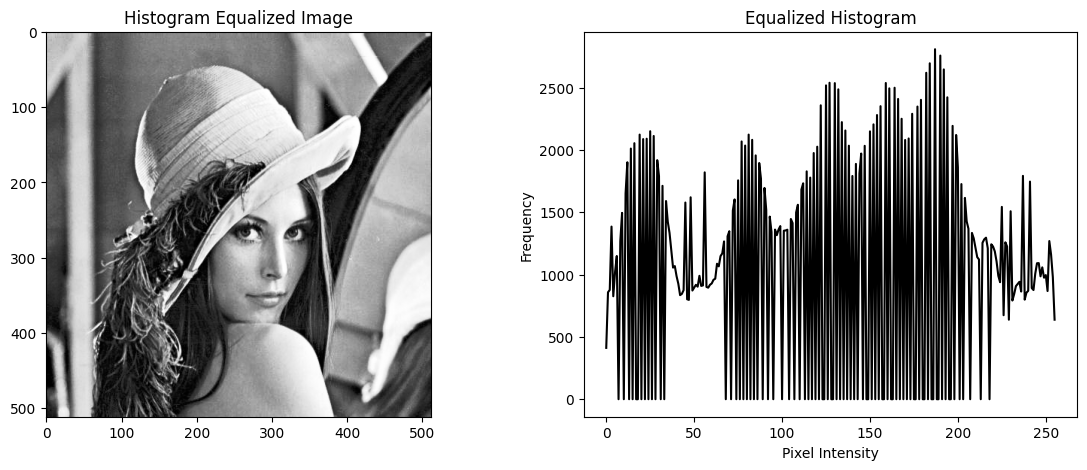

In [42]:
# --- 5. Histogram Equalization for Contrast Enhancement ---
equalized = cv2.equalizeHist(gray)
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


TASK 2

In [48]:
image = cv2.imread('/content/colored_picture.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path


In [45]:
# --- 1. Compute Fourier Transform using FFT ---
dft = np.fft.fft2(image)  # Compute DFT
dft_shifted = np.fft.fftshift(dft)  # Shift zero frequency to center

In [46]:
# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)  # Avoid log(0)

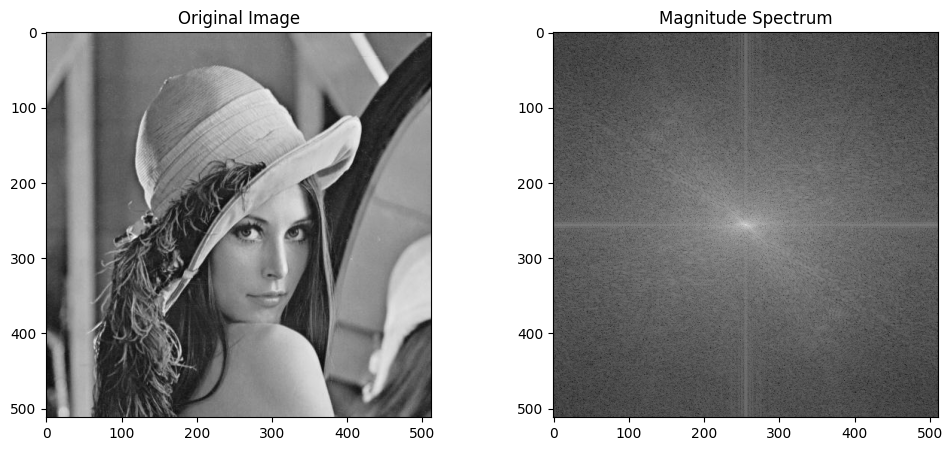

In [47]:
# Display original image and magnitude spectrum
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

In [49]:
# --- 2. Compute Inverse FFT to reconstruct the image ---
dft_inverse_shift = np.fft.ifftshift(dft_shifted)  # Shift back
reconstructed_image = np.fft.ifft2(dft_inverse_shift).real  # Apply IFFT

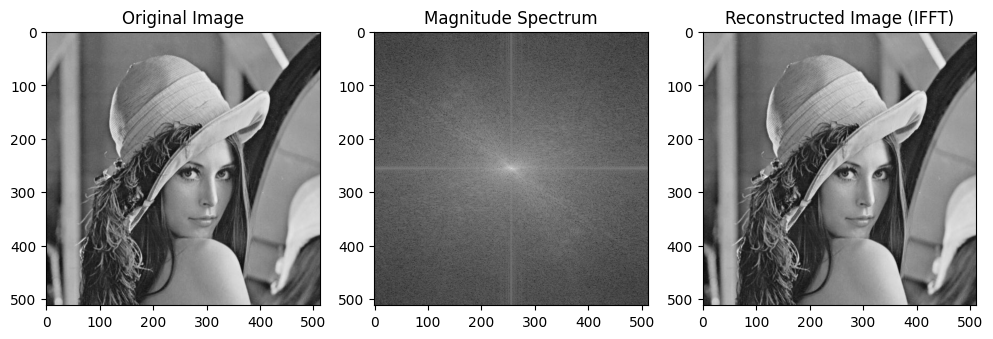

In [50]:
# Display reconstructed image
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image (IFFT)')
plt.show()

In [51]:
# --- 3. Verify Rotation Property of Fourier Transform ---
# Rotate image by 45 degrees
rows, cols = image.shape
center = (cols // 2, rows // 2)
M = cv2.getRotationMatrix2D(center, 45, 1)  # Rotation matrix
rotated_image = cv2.warpAffine(image, M, (cols, rows))

In [52]:
# Compute FFT of rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shifted = np.fft.fftshift(dft_rotated)
magnitude_rotated = 20 * np.log(np.abs(dft_rotated_shifted) + 1)

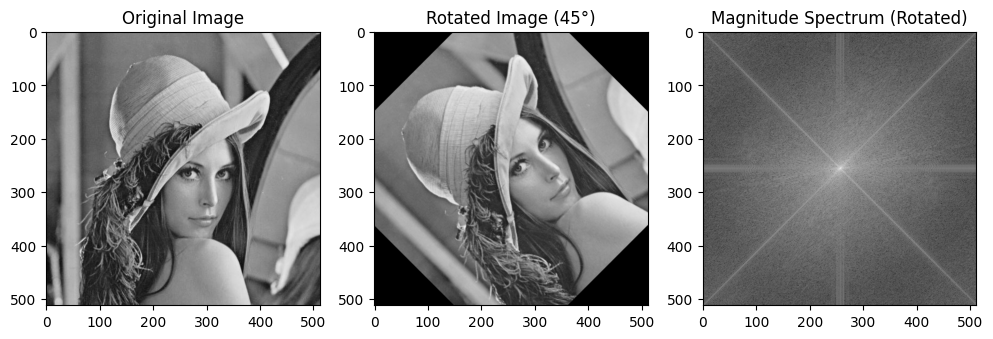

In [53]:
# Display rotated image and its magnitude spectrum
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image (45°)')

plt.subplot(1, 3, 3)
plt.imshow(magnitude_rotated, cmap='gray')
plt.title('Magnitude Spectrum (Rotated)')
plt.show()

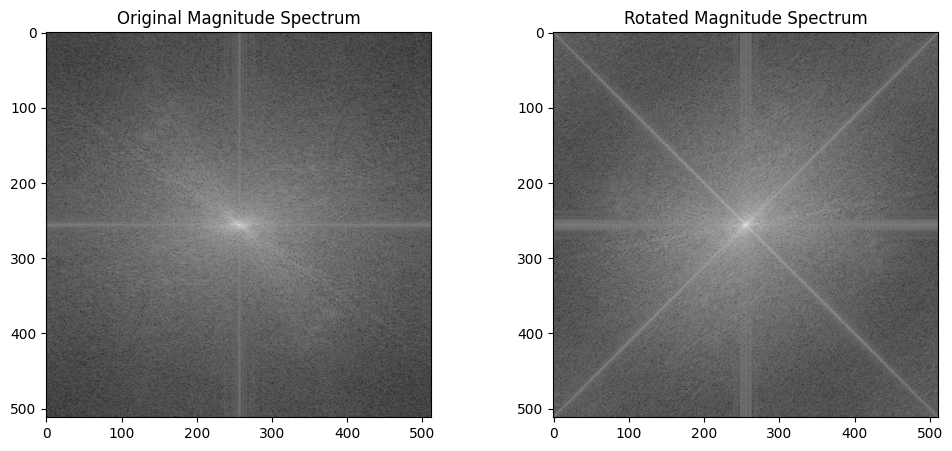

In [54]:
# Compare Original vs Rotated Spectrum
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Magnitude Spectrum')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_rotated, cmap='gray')
plt.title('Rotated Magnitude Spectrum')
plt.show()
